In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt

from src.micrograd import Value, MLP

from sklearn.datasets import make_moons, make_blobs

%matplotlib inline

In [9]:
np.random.seed(1996)
random.seed(1996)

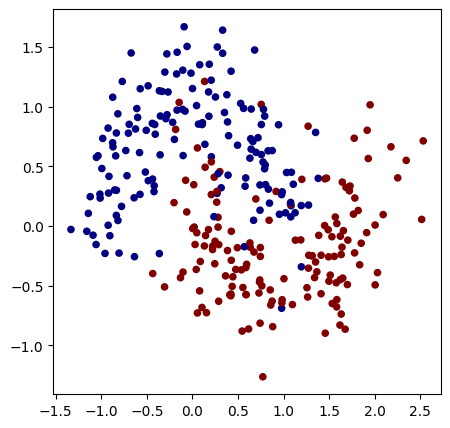

In [10]:
X, y = make_moons(n_samples=300, noise=0.3)
# X, y = make_blobs(n_samples=250, n_features=2, centers=2, cluster_std=2)
y = y*2 - 1

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.show()

In [11]:
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters 337


In [12]:
def loss(batch_size=None):
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    scores = list(map(model, inputs))
    
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss.data, acc)

0.8521213136827114 0.7133333333333334


In [13]:
# optimization
for k in range(50):
    
    total_loss, acc = loss(batch_size=32)
    
    model.zero_grad()
    total_loss.backward()
    
    learning_rate = 1.0 - 0.9* k /100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 0.8686138107133098, accuracy 75.0%
step 1 loss 2.221356413911413, accuracy 31.25%
step 2 loss 1.5030543869448418, accuracy 59.375%
step 3 loss 0.34691443556851587, accuracy 87.5%
step 4 loss 0.31794300802839515, accuracy 84.375%
step 5 loss 0.46800893142337757, accuracy 84.375%
step 6 loss 0.2517579151732073, accuracy 93.75%
step 7 loss 0.3895827107250844, accuracy 81.25%
step 8 loss 0.3720644291506014, accuracy 78.125%
step 9 loss 0.3611751302369587, accuracy 84.375%
step 10 loss 0.34623186220693825, accuracy 84.375%
step 11 loss 0.5571809386157975, accuracy 75.0%
step 12 loss 0.6201046912890517, accuracy 81.25%
step 13 loss 0.4343478520751172, accuracy 87.5%
step 14 loss 0.49211407438352145, accuracy 78.125%
step 15 loss 0.48137514917065133, accuracy 75.0%
step 16 loss 0.4919328146593446, accuracy 81.25%
step 17 loss 0.41831038410815335, accuracy 84.375%
step 18 loss 0.43451090330920483, accuracy 81.25%
step 19 loss 0.43625768395674314, accuracy 81.25%
step 20 loss 0.3034

(-2.263463398476034, 2.486536601523966)

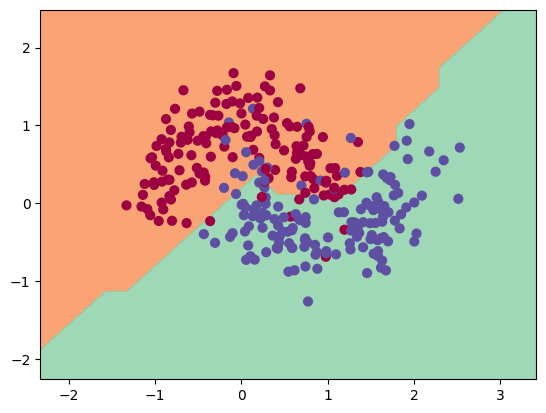

In [14]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())